# Visualisation de la distribution des classes en fonction des méthodes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset to examine its structure and contents
file_path = 'C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_resampling/class_distribution_details.csv'
new_data = pd.read_csv(file_path)

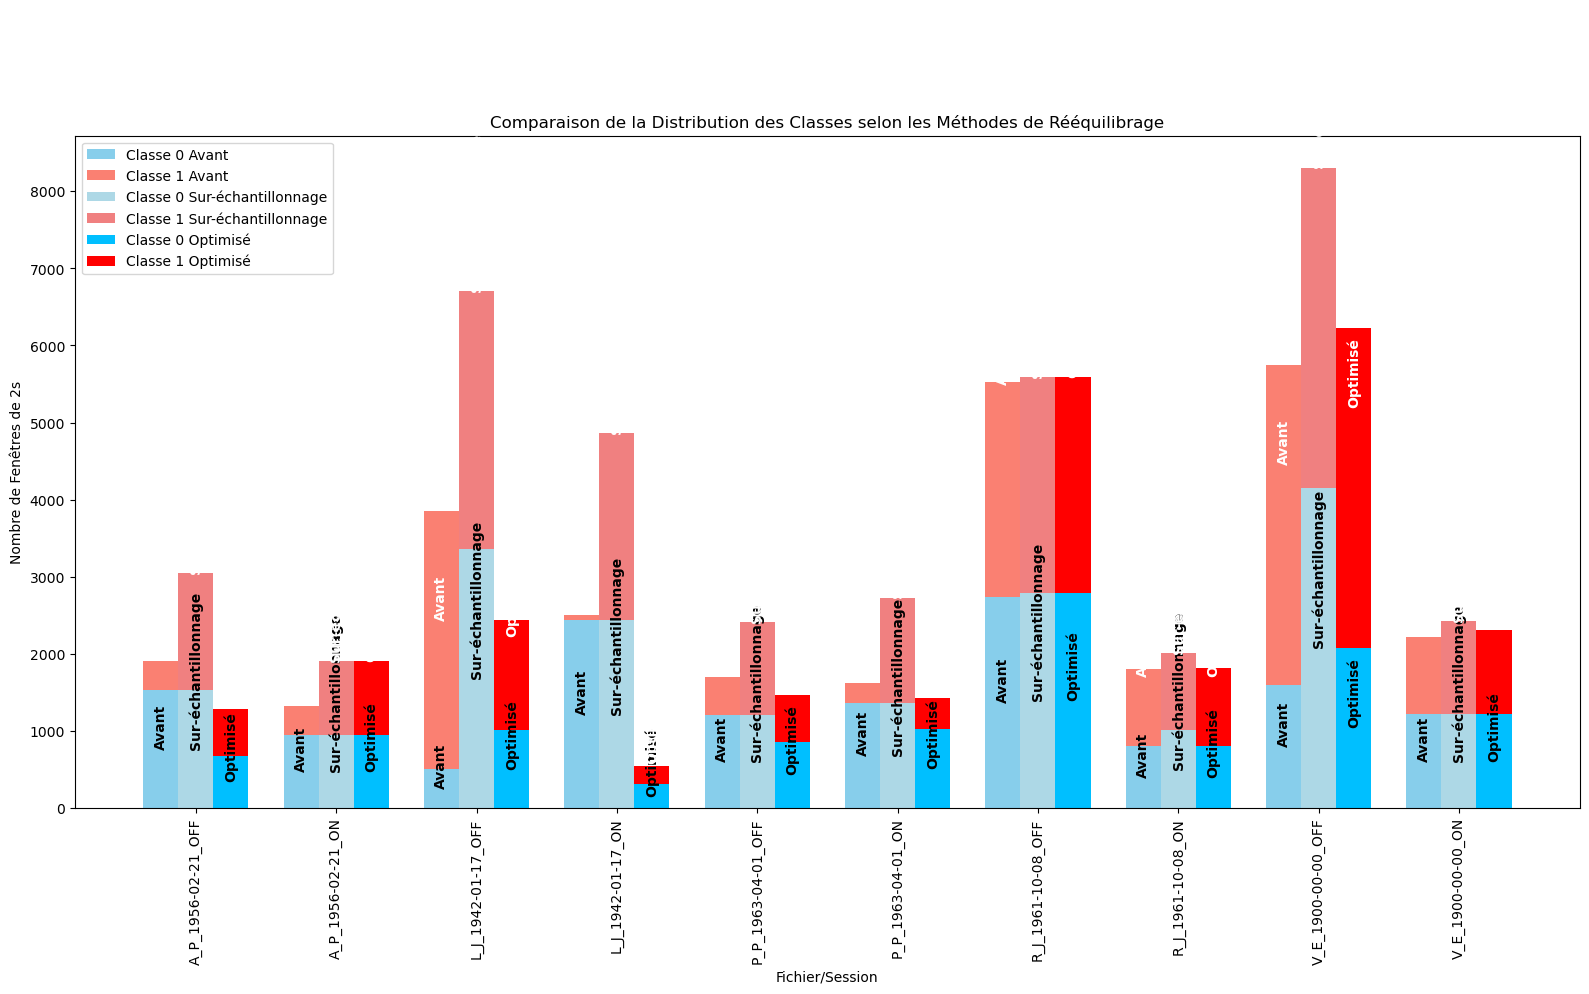

In [2]:
# Setting up data for stacked bar charts comparing class distributions for each resampling method side by side
class_distribution_data = new_data.set_index('File')[[
    'Before_Resampling_zero', 'Before_resampling_un',
    'After_Resampling_over_zero', 'After_Resampling_over_un',
    'After_Resampling_optimise_zero', 'After_Resampling_optimise_un'
]]

bar_width = 0.25
index = np.arange(len(class_distribution_data))

# Adjusting the plot with French labels for axes, title, and legend

fig, ax = plt.subplots(figsize=(16, 10))

# Colors for classes across methods
colors_class_0 = ['skyblue', 'lightblue', 'deepskyblue']
colors_class_1 = ['salmon', 'lightcoral', 'red']

# Plotting stacked bars with annotations
for idx, method_offset in enumerate(np.linspace(-bar_width, bar_width, 3)):
    # Selecting colors
    color_0 = colors_class_0[idx]
    color_1 = colors_class_1[idx]
    
    # Labels for methods in French
    labels = ['Avant', 'Sur-échantillonnage', 'Optimisé']
    label = labels[idx]
    
    # Bars for class 0
    bars = ax.bar(index + method_offset, class_distribution_data.iloc[:, idx*2], bar_width,
                  label=f'Classe 0 {label}', color=color_0)
    # Bars for class 1
    bars_b = ax.bar(index + method_offset, class_distribution_data.iloc[:, idx*2 + 1], bar_width,
                    bottom=class_distribution_data.iloc[:, idx*2], label=f'Classe 1 {label}', color=color_1)
    
    # Adding method labels inside bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height / 2, label, ha='center', va='bottom', color='black', fontweight='bold', rotation=90)
    for bar in bars_b:
        height = bar.get_height() + bar.get_y()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, label, ha='center', va='bottom', color='white', fontweight='bold', rotation=90)

ax.set_xlabel('Fichier/Session')
ax.set_ylabel('Nombre de Fenêtres de 2s')
ax.set_title('Comparaison de la Distribution des Classes selon les Méthodes de Rééquilibrage')
ax.set_xticks(index)
ax.set_xticklabels(class_distribution_data.index, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


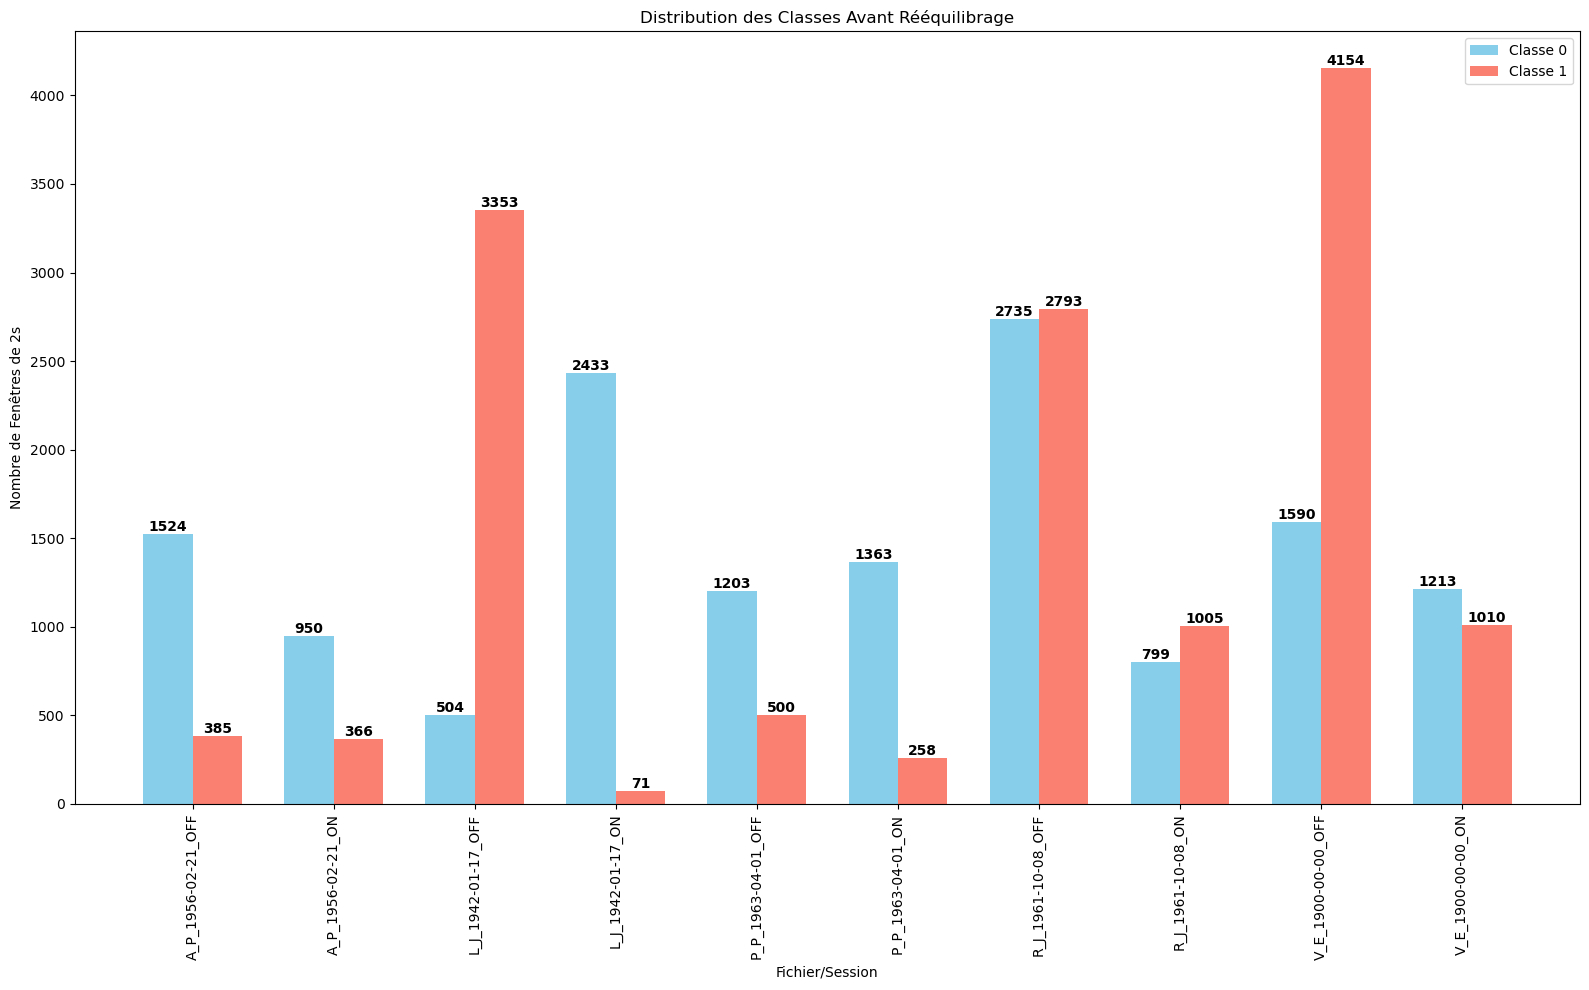

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Supposons que new_data est déjà défini et chargé correctement
class_distribution_data = new_data.set_index('File')[[
    'Before_Resampling_zero', 'Before_resampling_un'
]]

bar_width = 0.35
index = np.arange(len(class_distribution_data))

fig, ax = plt.subplots(figsize=(16, 10))

# Couleurs pour les classes
colors = ['skyblue', 'salmon']

# Etiquettes pour chaque barre
labels = ['Classe 0', 'Classe 1']

# Création des barres pour chaque classe
for i, (label, color) in enumerate(zip(labels, colors)):
    bars = ax.bar(index + i * bar_width, class_distribution_data.iloc[:, i], bar_width,
                  label=label, color=color)

    # Ajout des étiquettes sur chaque barre
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', color='black', fontweight='bold')

ax.set_xlabel('Fichier/Session')
ax.set_ylabel('Nombre de Fenêtres de 2s')
ax.set_title('Distribution des Classes Avant Rééquilibrage')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(class_distribution_data.index, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


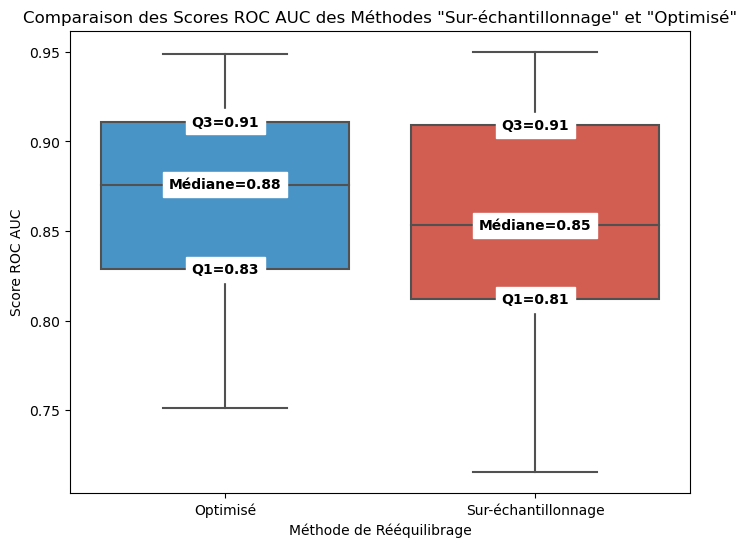

In [4]:
# Using a more appealing color palette for the boxplot
# Preparing data for the ROC AUC score comparison for "Over" and "Optimised" methods in a boxplot
roc_auc_data = new_data[['ROC_AUC_Score_Optimise', 'ROC_AUC_Score_Over']].melt(var_name='Méthode', value_name='Score ROC AUC')

# Translating method names to French for the plot
roc_auc_data['Méthode'] = roc_auc_data['Méthode'].replace({
    'ROC_AUC_Score_Optimise': 'Optimisé',
    'ROC_AUC_Score_Over': 'Sur-échantillonnage'
})


# Plotting the boxplot with annotated Q1, Median, and Q3 values
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(x='Méthode', y='Score ROC AUC', data=roc_auc_data, palette=['#3498db', '#e74c3c'])

# Annotating the Q1, Median, and Q3 values on the plot
for i, (method, sub_df) in enumerate(roc_auc_data.groupby('Méthode')):
    Q1 = sub_df['Score ROC AUC'].quantile(0.25)
    median = sub_df['Score ROC AUC'].quantile(0.5)
    Q3 = sub_df['Score ROC AUC'].quantile(0.75)
    # Display the values on the plot
    plt.text(i, Q1, f'Q1={Q1:.2f}', ha='center', va='center', color='black', fontweight='bold', backgroundcolor='white')
    plt.text(i, median, f'Médiane={median:.2f}', ha='center', va='center', color='black', fontweight='bold', backgroundcolor='white')
    plt.text(i, Q3, f'Q3={Q3:.2f}', ha='center', va='center', color='black', fontweight='bold', backgroundcolor='white')

plt.title('Comparaison des Scores ROC AUC des Méthodes "Sur-échantillonnage" et "Optimisé"')
plt.xlabel('Méthode de Rééquilibrage')
plt.ylabel('Score ROC AUC')
plt.show()


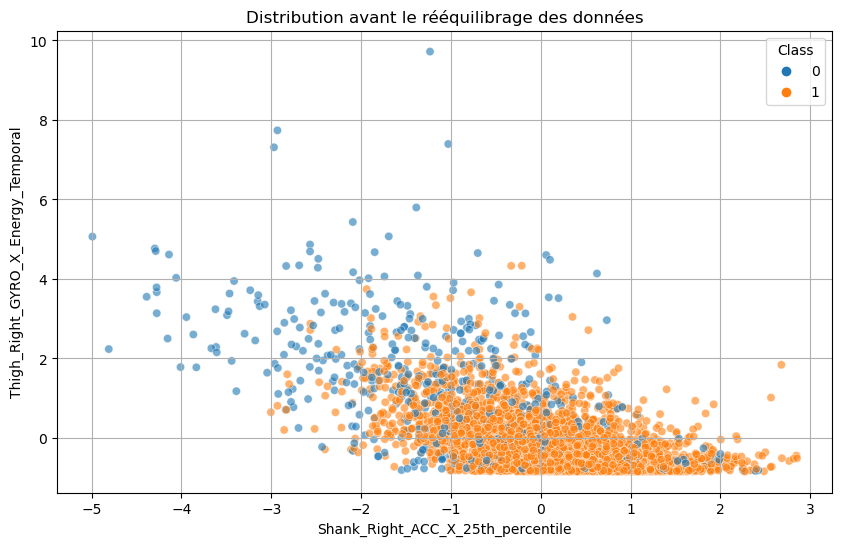

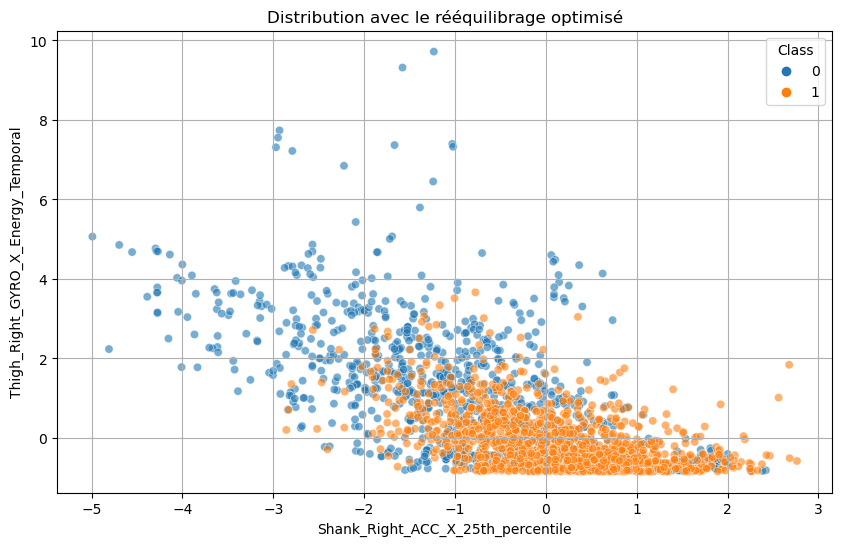

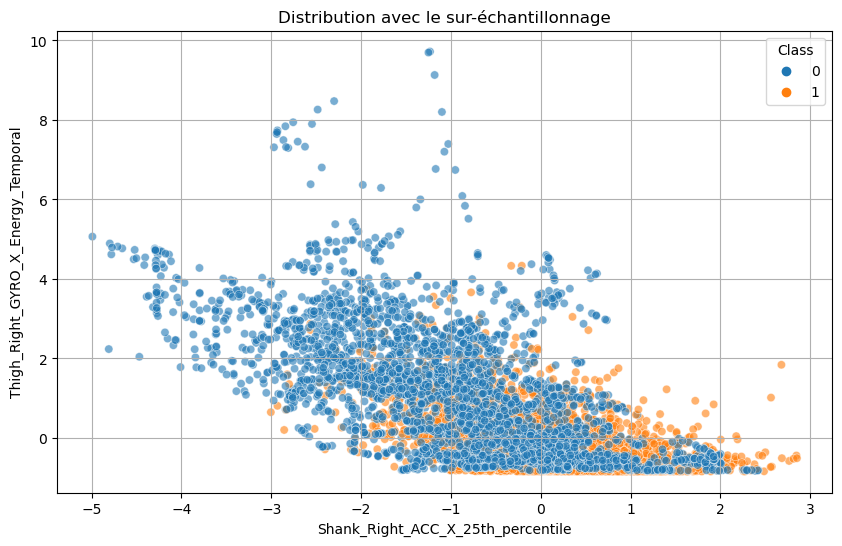

In [7]:
# Fonction pour créer un nuage de points
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X_train_initial = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_data_brute/train/X_train_L_J_1942-01-17_OFF_OFF_all_extraction_features_brut.csv')
y_train_initial = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_data_brute/train/Y_train_L_J_1942-01-17_OFF_OFF_all_extraction_features_brut.csv')

X_optimise = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_optimise/train/X_train_L_J_1942-01-17_OFF_OFF_all_extraction_features_optimise.csv')
y_optimise = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_optimise/train/y_train_L_J_1942-01-17_OFF_OFF_all_extraction_features_optimise.csv')


X_over = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/train/X_train_L_J_1942-01-17_OFF_OFF_all_extraction_features_over100.csv')
y_over = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/train/y_train_L_J_1942-01-17_OFF_OFF_all_extraction_features_over100.csv')

def plot_data(X, y, features, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[features[0]], y=X[features[1]], hue=y.squeeze(), alpha=0.6)  # Assurez-vous que y est une série pour hue
    plt.title(title)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()

# Nom des caractéristiques à visualiser
features = ["Shank_Right_ACC_X_25th_percentile", "Thigh_Right_GYRO_X_Energy_Temporal"]

# Affichage des graphiques
plot_data(X_train_initial, y_train_initial, features, "Distribution avant le rééquilibrage des données")
plot_data(X_optimise, y_optimise, features, "Distribution avec le rééquilibrage optimisé")
plot_data(X_over, y_over, features, "Distribution avec le sur-échantillonnage")

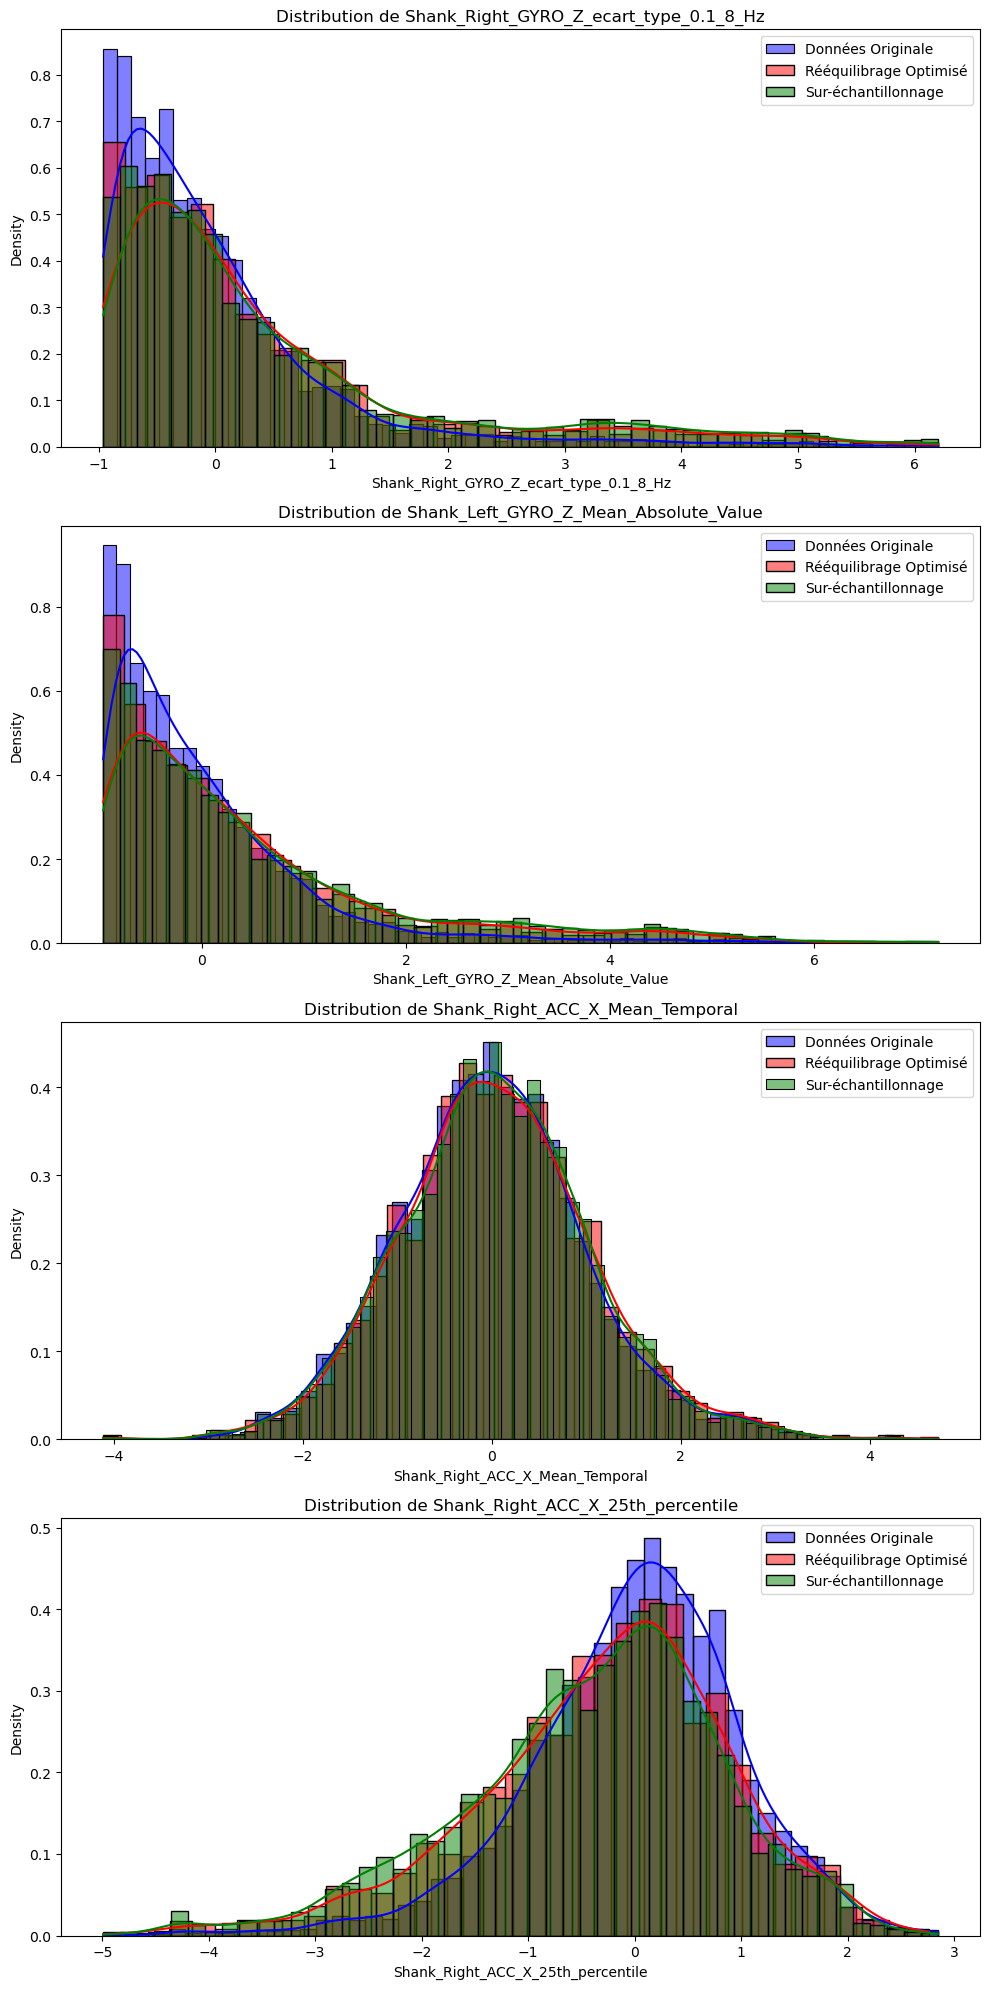

In [8]:
# Sélection des caractéristiques spécifiques à visualiser
features_to_plot = ["Shank_Right_GYRO_Z_ecart_type_0.1_8_Hz", "Shank_Left_GYRO_Z_Mean_Absolute_Value", "Shank_Right_ACC_X_Mean_Temporal", "Shank_Right_ACC_X_25th_percentile"]

# Fonction pour tracer les distributions des caractéristiques
def plot_feature_distributions(df1, df2, df3, feature_names, df1_label='Données Originale', df2_label='Rééquilibrage Optimisé', df3_label='Sur-échantillonnage'):
    fig, axes = plt.subplots(nrows=len(feature_names), ncols=1, figsize=(10, 5 * len(feature_names)))
    for i, feature in enumerate(feature_names):
        ax = axes[i] if len(feature_names) > 1 else axes
        sns.histplot(df1[feature], color="blue", label=df1_label, kde=True, ax=ax, stat="density", common_norm=False)
        sns.histplot(df2[feature], color="red", label=df2_label, kde=True, ax=ax, stat="density", common_norm=False)
        sns.histplot(df3[feature], color="green", label=df3_label, kde=True, ax=ax, stat="density", common_norm=False)
        ax.set_title(f'Distribution de {feature}')
        ax.legend()
    plt.tight_layout()
    plt.show()

# Appel de la fonction pour tracer les distributions des caractéristiques choisies
plot_feature_distributions(X_train_initial, X_optimise, X_over, features_to_plot)

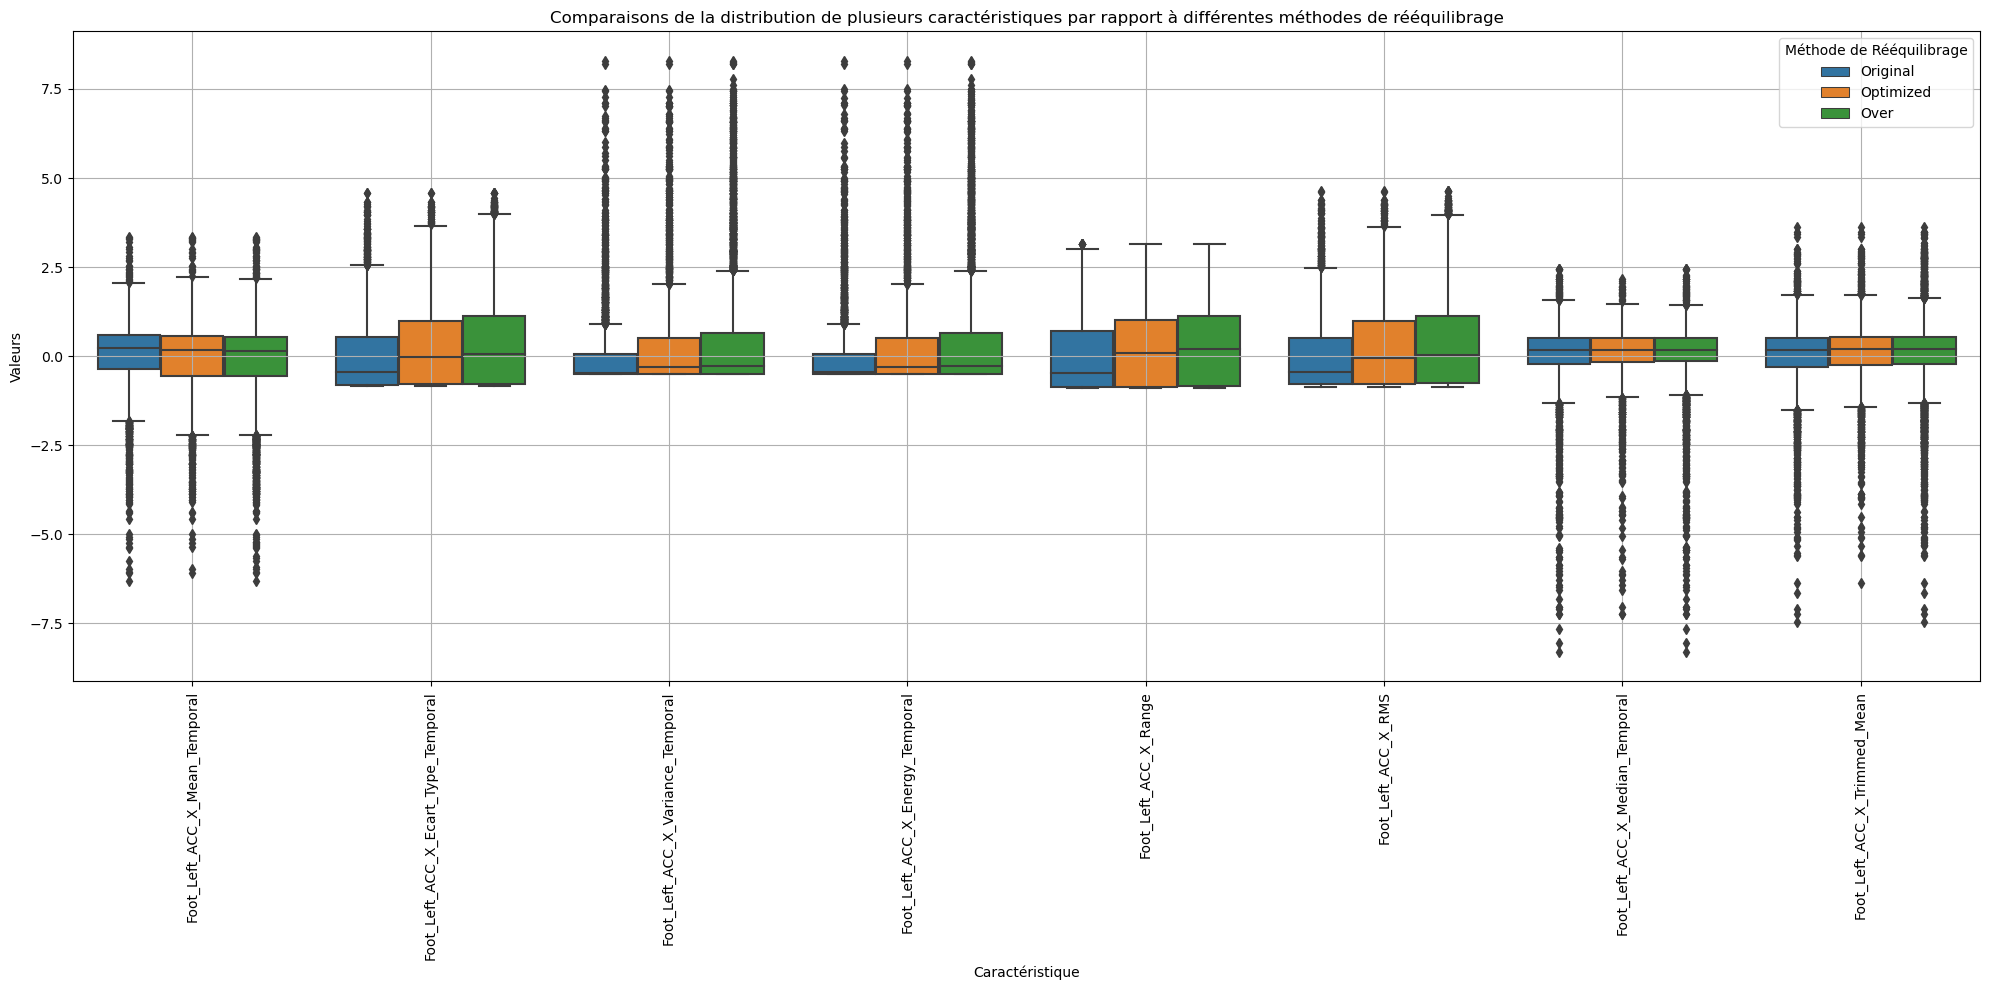

In [9]:
# Liste des caractéristiques à visualiser
features_to_plot = X_train_initial.columns[:8]  # Ajustez pour inclure les caractéristiques souhaitées

# Fonction pour tracer les boxplots des caractéristiques
def plot_feature_boxplots(df1, df2, df3, feature_names):
    # Concaténation des DataFrames pour faciliter la visualisation
    data = pd.concat([df1[feature_names], df2[feature_names], df3[feature_names]], keys=['Original', 'Optimized', 'Over'], axis=0)
    data = data.reset_index(level=0).rename(columns={'level_0': 'Method'})
    data = data.melt(id_vars='Method', var_name='Feature', value_name='Value')

    # Création des boxplots
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=data, x='Feature', y='Value', hue='Method')
    plt.xticks(rotation=90)
    plt.title('Comparaisons de la distribution de plusieurs caractéristiques par rapport à différentes méthodes de rééquilibrage')
    plt.xlabel('Caractéristique')
    plt.ylabel('Valeurs')
    plt.legend(title='Méthode de Rééquilibrage')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Appel de la fonction pour tracer les boxplots des caractéristiques choisies
plot_feature_boxplots(X_train_initial, X_optimise, X_over, features_to_plot)

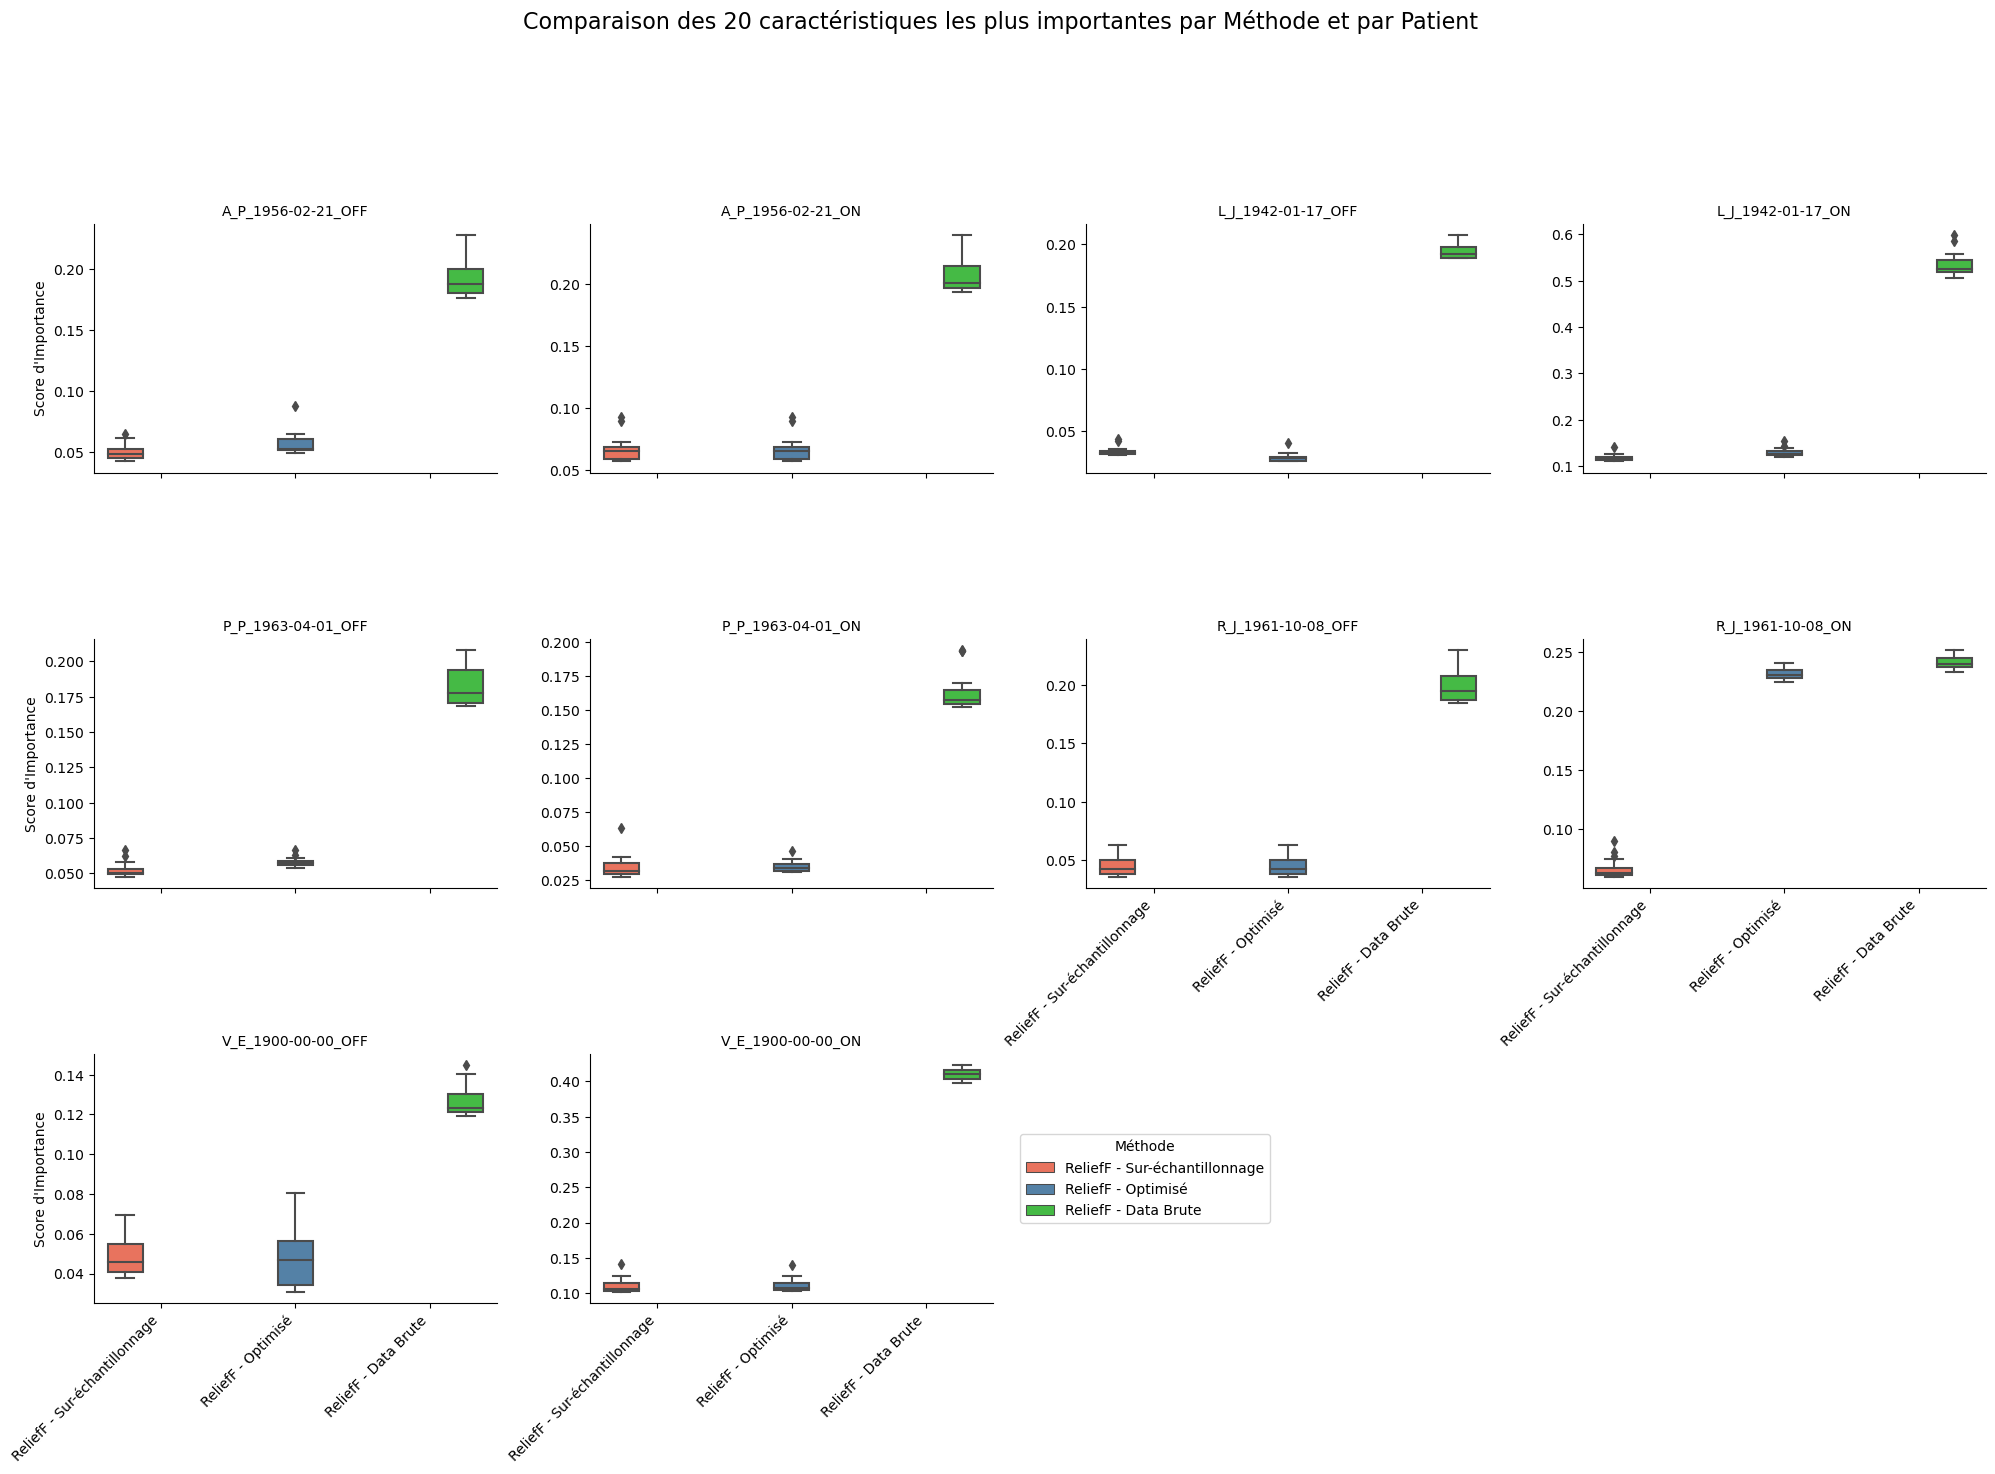

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Chemin du dossier où tous les fichiers CSV avec les scores sont stockés
output_folder = 'C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/score_importance_relief_condition'

# Fonction pour extraire l'identifiant du patient à partir du nom du fichier
def extract_patient_id(filename):
    return '_'.join(filename.split('_')[:4])

# Fonction pour charger les données des scores d'importance de ReliefF selon le suffixe et regrouper par patient
def load_relief_scores(directory, suffix, label):
    scores = pd.DataFrame()
    for file in os.listdir(directory):
        if file.endswith(f'{suffix}.csv'):
            file_path = os.path.join(directory, file)
            df_temp = pd.read_csv(file_path).head(20)
            df_temp['Méthode'] = label
            df_temp['Patient'] = extract_patient_id(file)
            scores = pd.concat([scores, df_temp], ignore_index=True)
    return scores

# Charger les données pour chaque configuration en utilisant des suffixes spécifiques
scores_over = load_relief_scores(output_folder, 'over100_feature_importances', 'ReliefF - Sur-échantillonnage')
scores_optimise = load_relief_scores(output_folder, 'optimise_feature_importances', 'ReliefF - Optimisé')
scores_data_brute = load_relief_scores(output_folder, 'brut_feature_importances', 'ReliefF - Data Brute')


# Agglomérer toutes les données dans un seul DataFrame
all_scores = pd.concat([scores_over, scores_optimise, scores_data_brute], ignore_index=True)

# Définir une palette de couleurs vives pour les nouvelles méthodes
palette = {
    'ReliefF - Sur-échantillonnage': "#FF6347", 
    'ReliefF - Optimisé': "#4682B4", 
    'ReliefF - Data Brute': "#32CD32"
}

# Fonction personnalisée pour tracer les boxplots et configurer les étiquettes
def custom_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y, **kwargs)
    plt.xticks(rotation=45, ha='right')

# Création des graphiques pour chaque patient
g = sns.FacetGrid(all_scores, col='Patient', col_wrap=4, height=5, sharey=False)
g.map_dataframe(custom_boxplot, x='Méthode', y='Score', hue='Méthode', palette=palette)

# Suppression des légendes individuelles et ajout d'une légende globale
plt.legend(title='Méthode', loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=True)

g.set_axis_labels("", "Score d'Importance")
g.set_titles("{col_name}")

# Ajuster l'espace entre les graphiques
plt.subplots_adjust(top=0.85)

# Ajouter explicitement le titre au centre
g.fig.text(0.5, 0.98, 'Comparaison des 20 caractéristiques les plus importantes par Méthode et par Patient', fontsize=16, ha='center')

plt.show()


In [9]:
import pandas as pd

# Présumons que all_scores est déjà chargé
# Création d'un dictionnaire pour stocker les DataFrames par patient
patient_dfs = {}

# Itérer sur chaque combinaison unique de patient et méthode
for (patient, methode), group in all_scores.groupby(['Patient', 'Méthode']):
    # Sélectionner les 5 meilleures caractéristiques pour cette combinaison
    top_features = group.nlargest(5, 'Score')[['Feature', 'Score']]
    
    # Créer ou ajouter au DataFrame pour ce patient
    if patient not in patient_dfs:
        patient_dfs[patient] = {}
    patient_dfs[patient][methode] = top_features

# Chemin de base pour sauvegarder les fichiers
base_path = 'C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/Top_Features/'

# Sauvegarder chaque DataFrame dans un fichier Excel, une feuille par méthode
for patient, methods in patient_dfs.items():
    with pd.ExcelWriter(f'{base_path}{patient}.xlsx') as writer:
        for method, df in methods.items():
            df.to_excel(writer, sheet_name=method, index=False)

    print(f"Tableau pour {patient} sauvegardé avec succès.")


Tableau pour A_P_1956-02-21_OFF sauvegardé avec succès.
Tableau pour A_P_1956-02-21_ON sauvegardé avec succès.
Tableau pour L_J_1942-01-17_OFF sauvegardé avec succès.
Tableau pour L_J_1942-01-17_ON sauvegardé avec succès.
Tableau pour P_P_1963-04-01_OFF sauvegardé avec succès.
Tableau pour P_P_1963-04-01_ON sauvegardé avec succès.
Tableau pour R_J_1961-10-08_OFF sauvegardé avec succès.
Tableau pour R_J_1961-10-08_ON sauvegardé avec succès.
Tableau pour V_E_1900-00-00_OFF sauvegardé avec succès.
Tableau pour V_E_1900-00-00_ON sauvegardé avec succès.


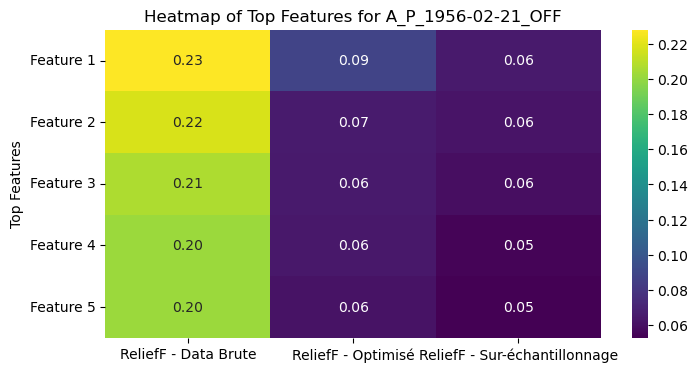

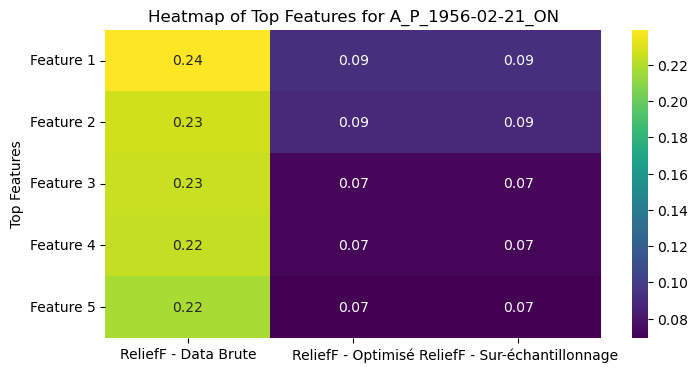

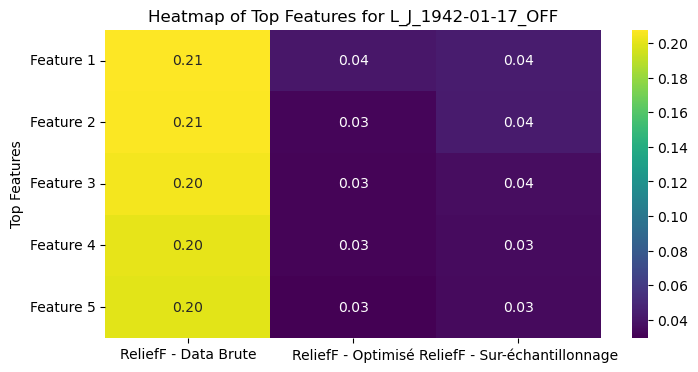

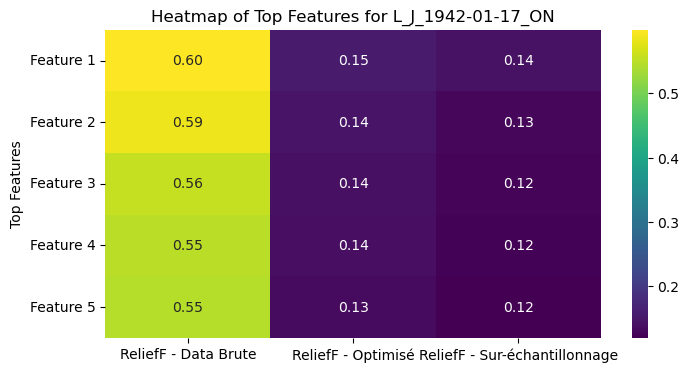

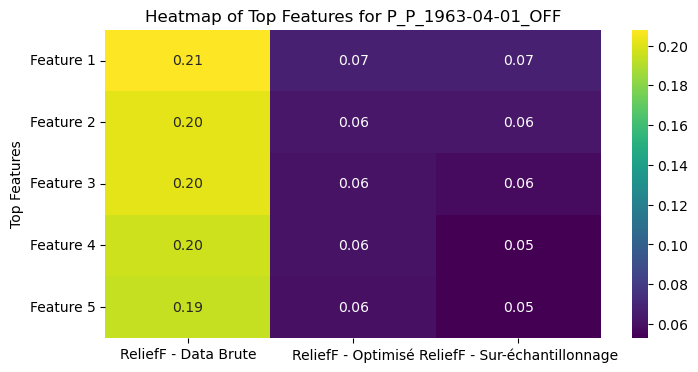

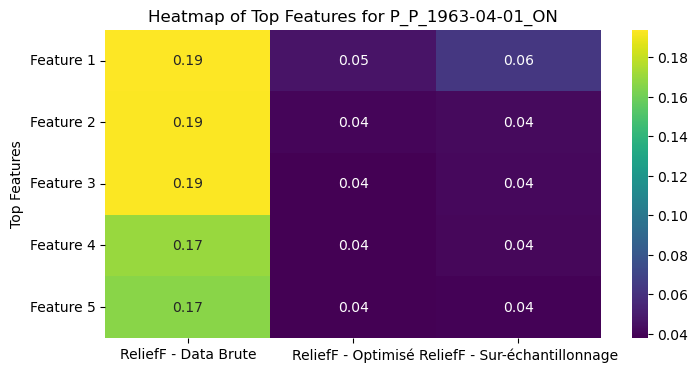

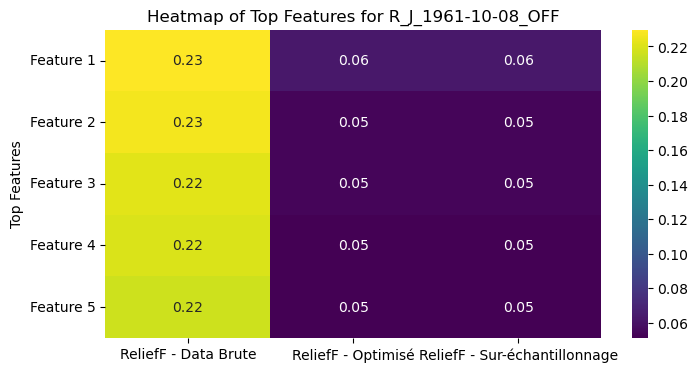

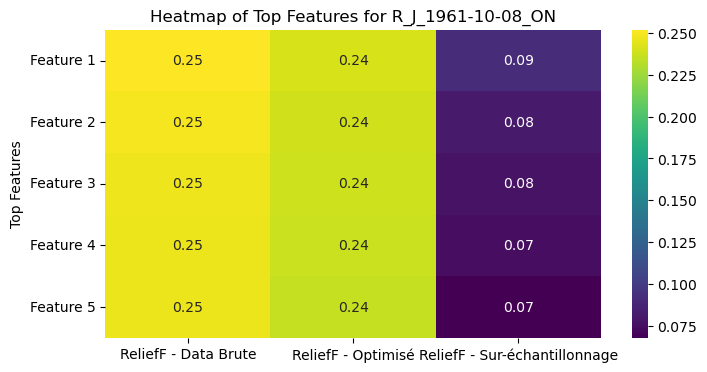

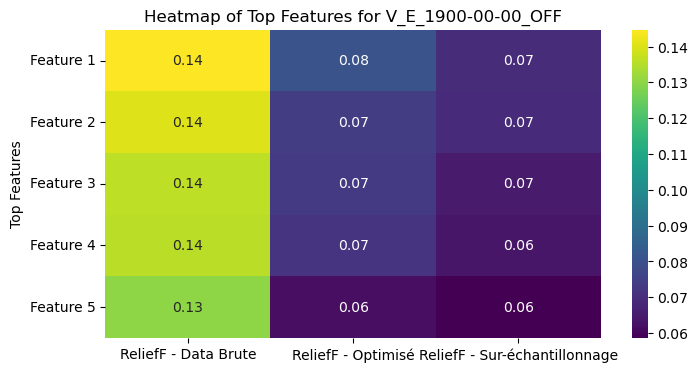

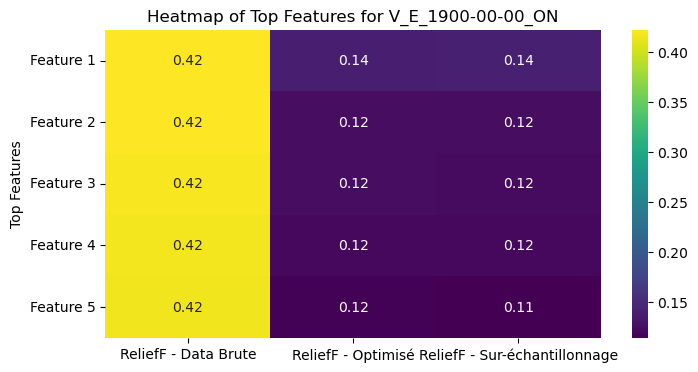

In [10]:
for patient, methods in patient_dfs.items():
    fig, ax = plt.subplots(figsize=(8, 4))
    # Création d'un DataFrame pour le heatmap
    heatmap_data = pd.DataFrame({m: d['Score'].values for m, d in methods.items()}, index=[f'Feature {i+1}' for i in range(5)])
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='viridis', ax=ax)
    ax.set_title(f'Heatmap of Top Features for {patient}')
    ax.set_ylabel('Top Features')
    ax.set_xlabel('')
    plt.show()


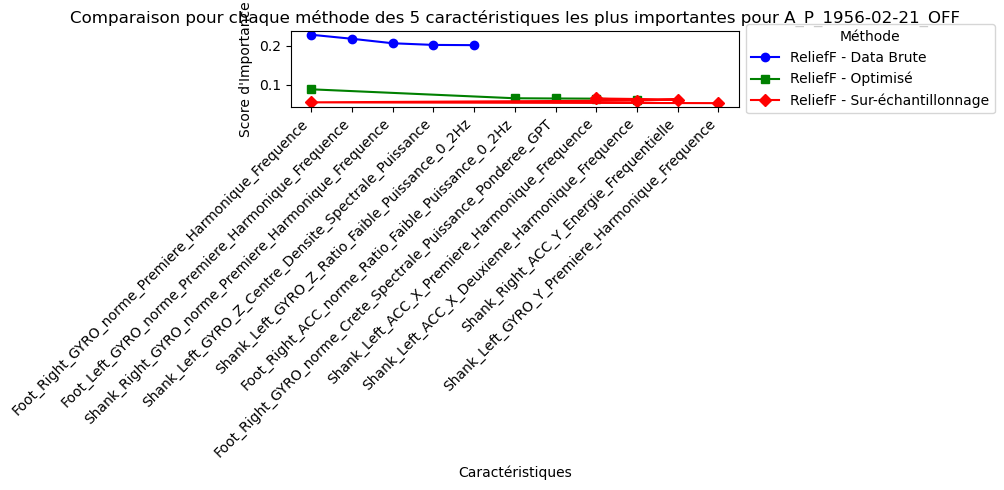

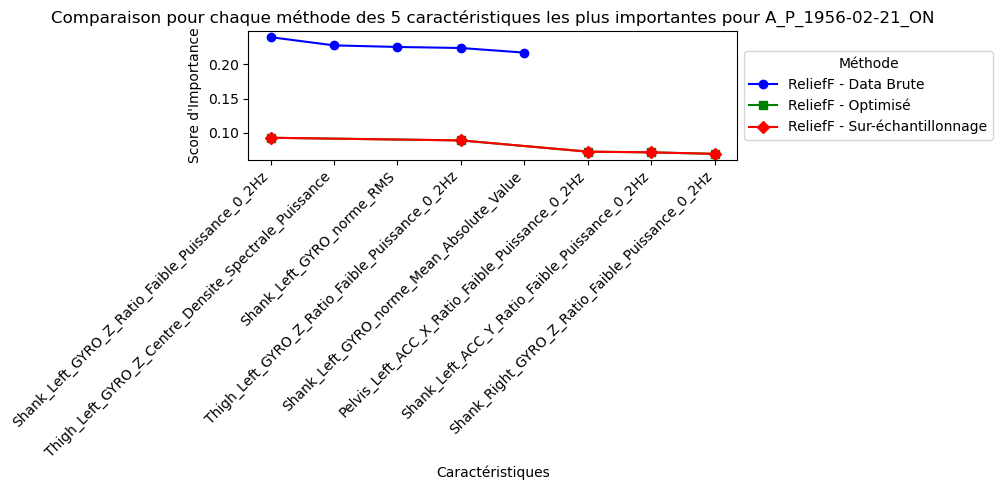

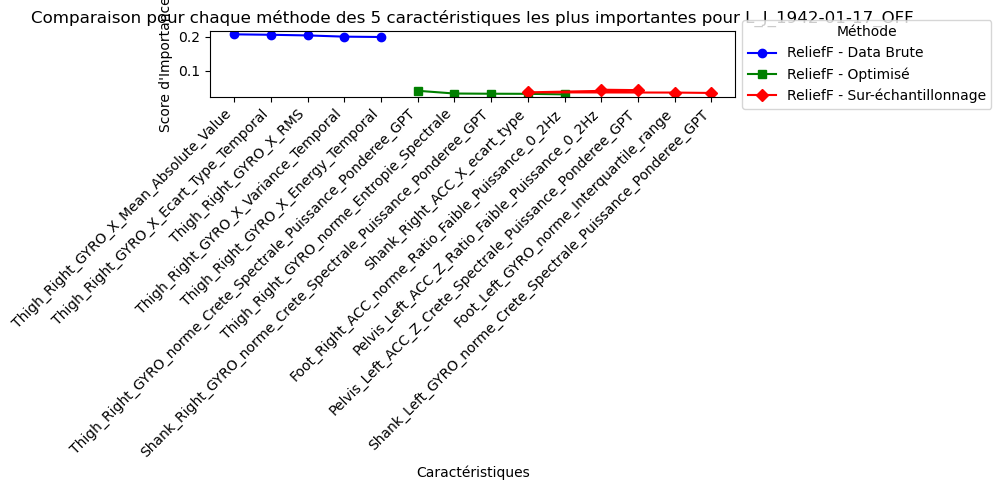

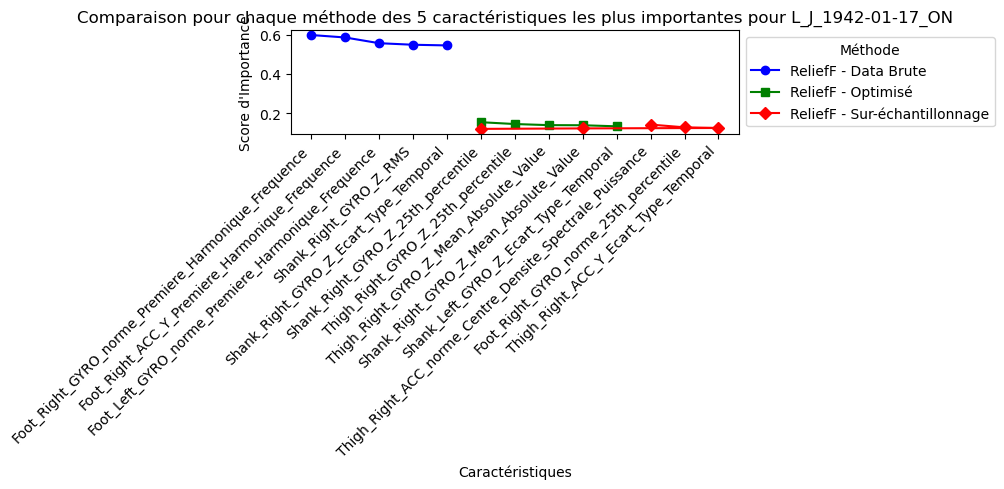

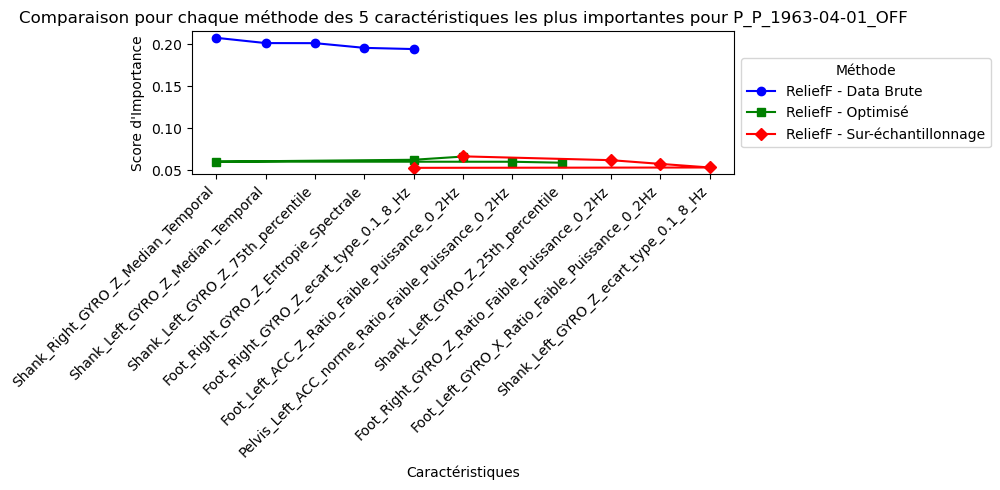

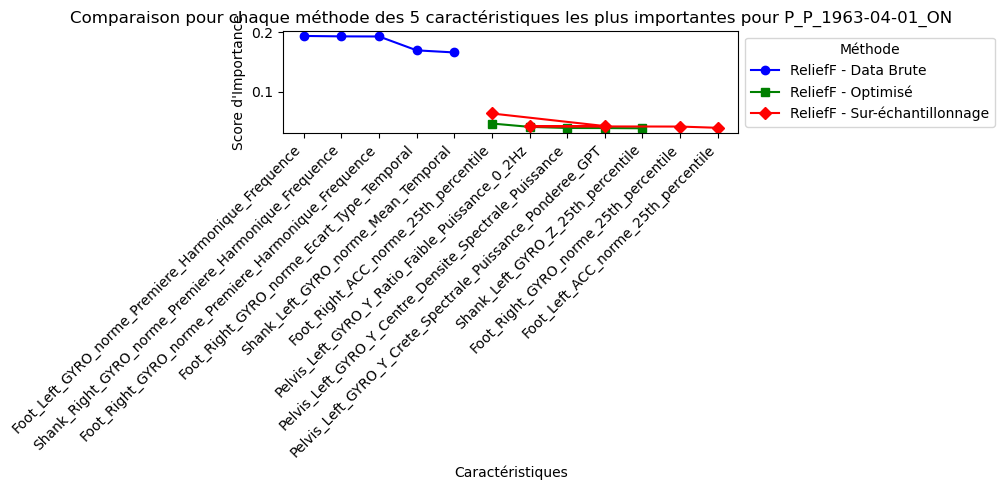

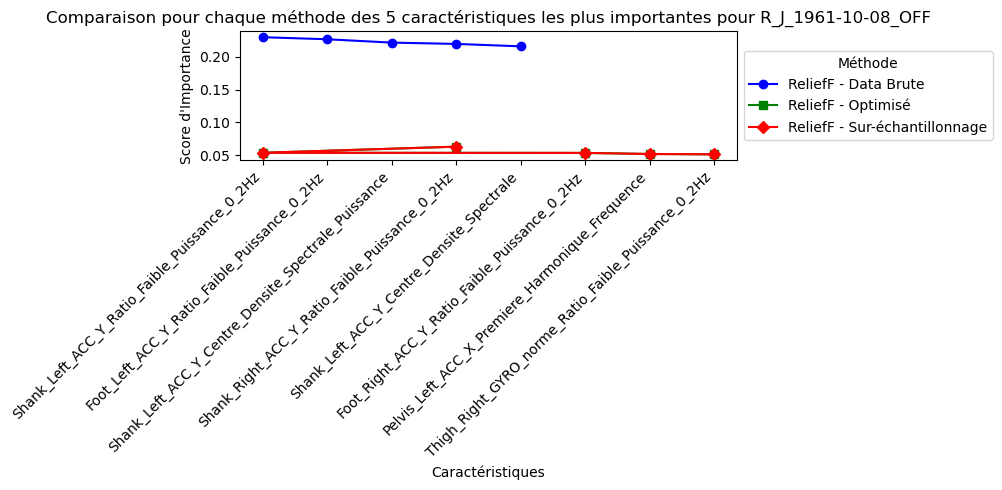

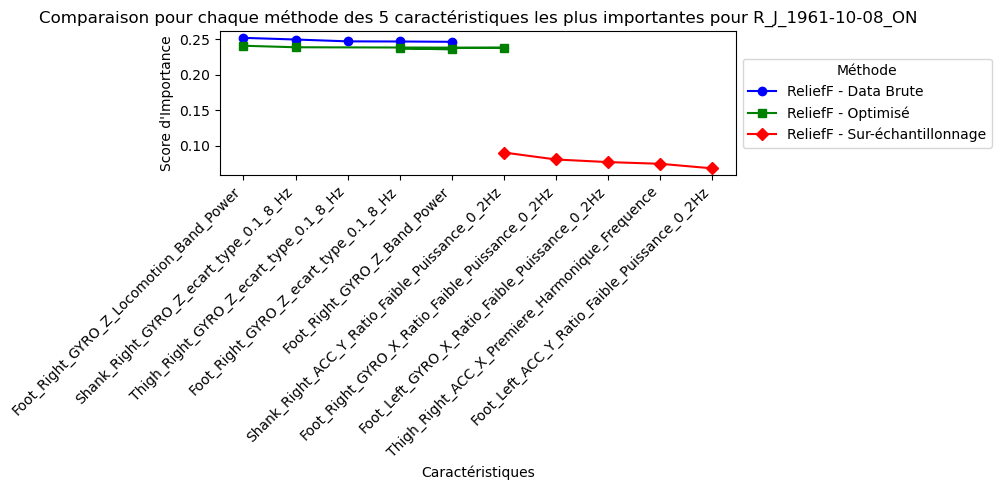

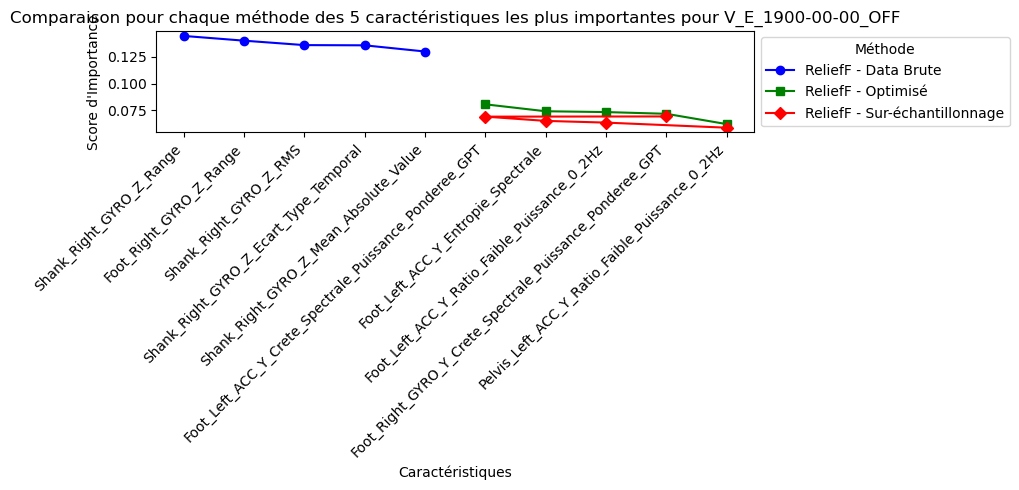

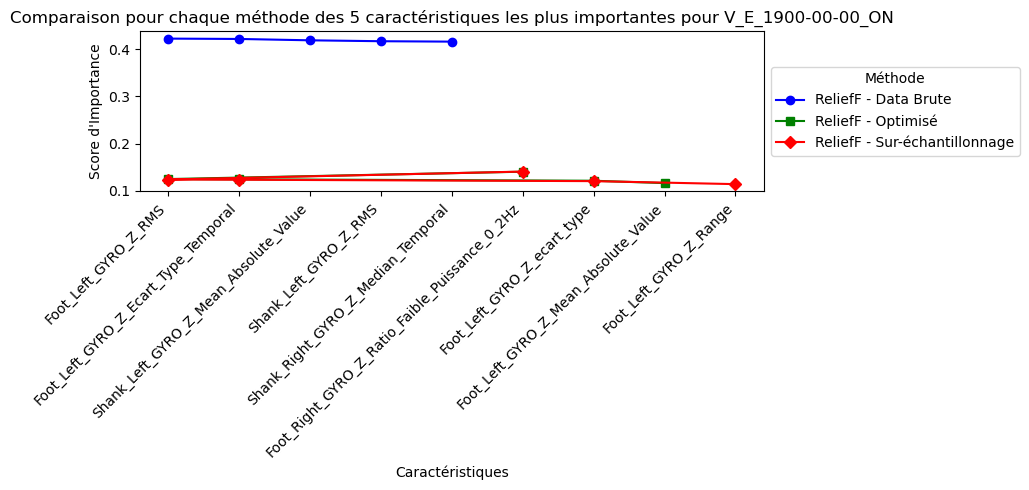

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

# Supposons que 'patient_dfs' est un dictionnaire avec les DataFrames pour chaque patient comme précédemment discuté
for patient, methods in patient_dfs.items():
    fig, ax = plt.subplots(figsize=(10, 5))
    colors = cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])
    markers = cycle(['o', 's', 'D', '^', 'v', '<', '>'])  # Différents marqueurs pour chaque méthode
    
    for method, df in methods.items():
        # Assurer que chaque méthode utilise une couleur et un marqueur différent
        color = next(colors)
        marker = next(markers)
        df = df.sort_values(by='Score', ascending=False)  # Trier pour mieux visualiser
        ax.plot(df['Feature'], df['Score'], label=f'{method}', color=color, marker=marker)

    ax.set_title(f'Comparaison pour chaque méthode des 5 caractéristiques les plus importantes pour {patient}')
    ax.set_xlabel('Caractéristiques')
    ax.set_ylabel('Score d\'Importance')
    
    # Placer la légende à l'extérieur du graphique
    plt.legend(title='Méthode', loc='center left', bbox_to_anchor=(1, 0.5))

    plt.xticks(rotation=45, ha="right")  # Incliner les étiquettes des caractéristiques
    plt.tight_layout()
    plt.show()


# Visualisation ML

## Pour données over

### Moyenne des résultats

                                       Identifier         Model  \
0  A_P_1956-02-21_OFF_OFF_all_extraction_features  RandomForest   
1    A_P_1956-02-21_ON_ON_all_extraction_features  RandomForest   
2  L_J_1942-01-17_OFF_OFF_all_extraction_features  RandomForest   
3    L_J_1942-01-17_ON_ON_all_extraction_features  RandomForest   
4  P_P_1963-04-01_OFF_OFF_all_extraction_features  RandomForest   

   Top N Features  F1-Score (weighted avg)  Accuracy  Recall (weighted avg)  \
0              10                 0.841140  0.837607               0.837607   
1              10                 0.903049  0.904255               0.904255   
2              10                 0.885044  0.881428               0.881428   
3              10                 0.973226  0.970205               0.970205   
4              10                 0.817636  0.816438               0.816438   

   Support (weighted avg)       AUC  Train Distribution 0  \
0                   819.0  0.899815                  1524   


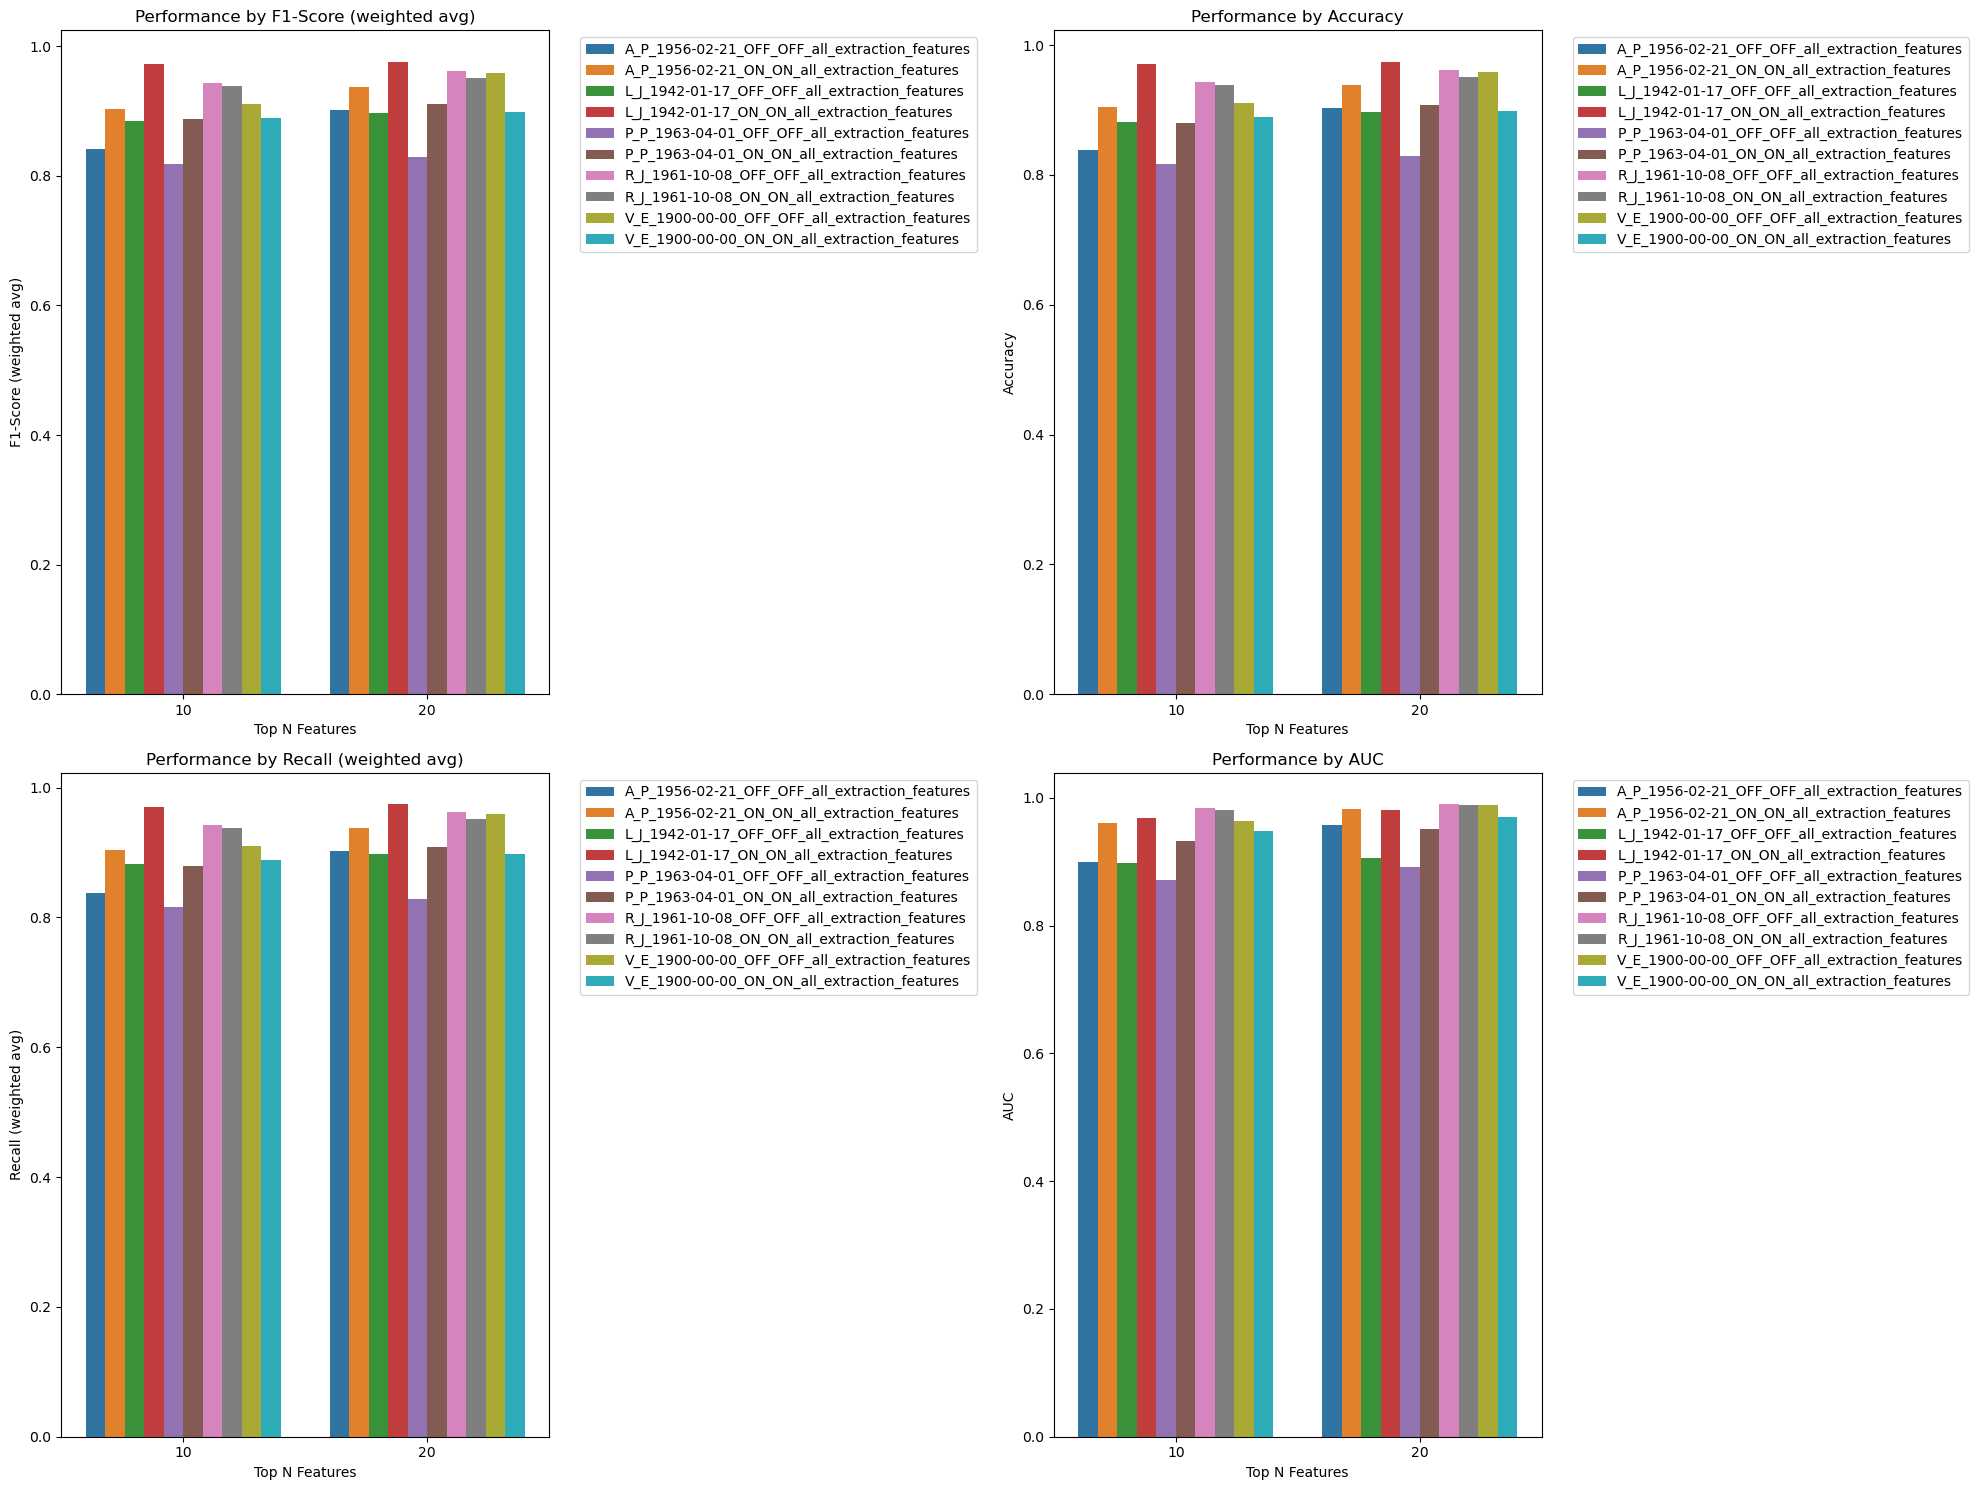

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Charger les données
file_path = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_over.csv"
results_df = pd.read_csv(file_path)

# Afficher les premières lignes du DataFrame pour examiner les colonnes
print(results_df.head())

# Graphiques de barres pour les métriques de performance par Identifier et Top N Features
metrics = ['F1-Score (weighted avg)', 'Accuracy', 'Recall (weighted avg)', 'AUC']

plt.figure(figsize=(20, 15))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=results_df, x='Top N Features', y=metric, hue='Identifier')
    plt.title(f'Performance by {metric}')
    plt.xlabel('Top N Features')
    plt.ylabel(metric)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# # Matrice de confusion pour chaque Identifier et chaque Top N Features
# identifiers = results_df['Identifier'].unique()
# top_n_values = results_df['Top N Features'].unique()

# for identifier in identifiers:
#     for top_n in top_n_values:
#         selected_model = results_df[(results_df['Identifier'] == identifier) & (results_df['Top N Features'] == top_n)]
#         if not selected_model.empty:
#             cm = [[selected_model['Confusion Matrix TN'].values[0], selected_model['Confusion Matrix FP'].values[0]],
#                   [selected_model['Confusion Matrix FN'].values[0], selected_model['Confusion Matrix TP'].values[0]]]

#             plt.figure(figsize=(6, 5))
#             sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
#             plt.title(f'Confusion Matrix for {identifier} with Top {top_n} Features')
#             plt.xlabel('Predicted')
#             plt.ylabel('Actual')
#             plt.show()


### Résultats classe 1 et 0

                                       Identifier         Model  \
0  A_P_1956-02-21_OFF_OFF_all_extraction_features  RandomForest   
1    A_P_1956-02-21_ON_ON_all_extraction_features  RandomForest   
2  L_J_1942-01-17_OFF_OFF_all_extraction_features  RandomForest   
3    L_J_1942-01-17_ON_ON_all_extraction_features  RandomForest   
4  P_P_1963-04-01_OFF_OFF_all_extraction_features  RandomForest   

   Top N Features  F1-Score (weighted avg)  Accuracy  Recall (weighted avg)  \
0              10                 0.841140  0.837607               0.837607   
1              10                 0.903049  0.904255               0.904255   
2              10                 0.885044  0.881428               0.881428   
3              10                 0.973226  0.970205               0.970205   
4              10                 0.817636  0.816438               0.816438   

   Support (weighted avg)       AUC  Train Distribution 0  \
0                   819.0  0.899815                  1524   


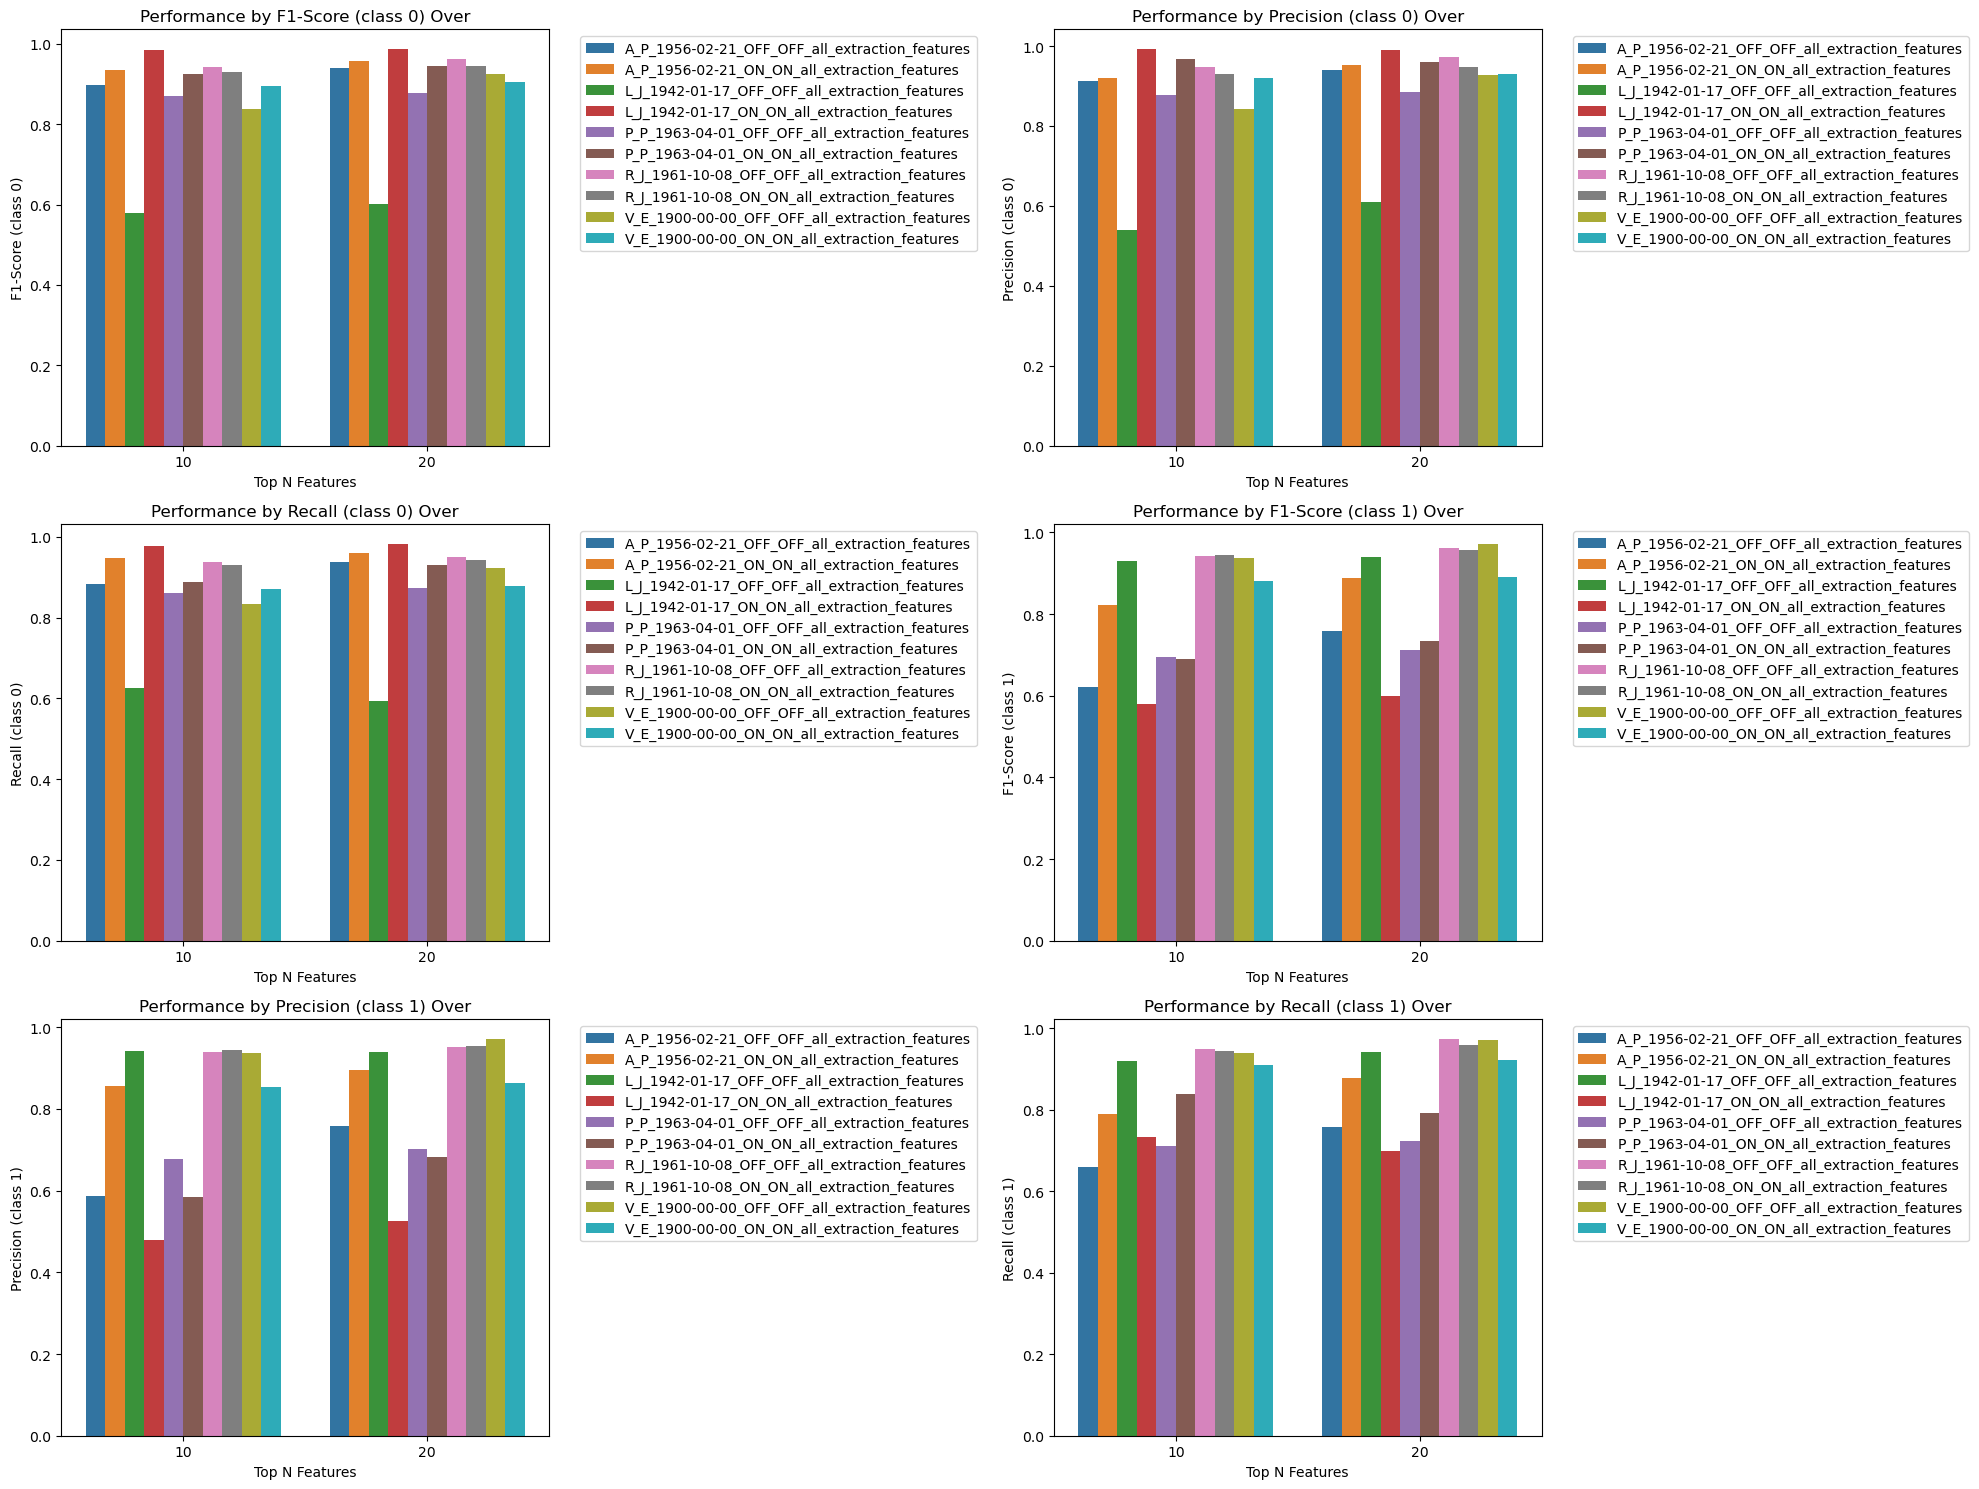

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Charger les données
file_path = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_over.csv"
results_df = pd.read_csv(file_path)

# Afficher les premières lignes du DataFrame pour examiner les colonnes
print(results_df.head())

# Graphiques de barres pour les métriques de performance par classe, Identifier et Top N Features
metrics_class_0 = ['F1-Score (class 0)', 'Precision (class 0)', 'Recall (class 0)']
metrics_class_1 = ['F1-Score (class 1)', 'Precision (class 1)', 'Recall (class 1)']

plt.figure(figsize=(20, 15))

for i, metric in enumerate(metrics_class_0 + metrics_class_1, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=results_df, x='Top N Features', y=metric, hue='Identifier')
    plt.title(f'Performance by {metric} Over')
    plt.xlabel('Top N Features')
    plt.ylabel(metric)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# # Matrice de confusion pour chaque Identifier et chaque Top N Features
# identifiers = results_df['Identifier'].unique()
# top_n_values = results_df['Top N Features'].unique()

# for identifier in identifiers:
#     for top_n in top_n_values:
#         selected_model = results_df[(results_df['Identifier'] == identifier) & (results_df['Top N Features'] == top_n)]
#         if not selected_model.empty:
#             cm = [[selected_model['Confusion Matrix TN'].values[0], selected_model['Confusion Matrix FP'].values[0]],
#                   [selected_model['Confusion Matrix FN'].values[0], selected_model['Confusion Matrix TP'].values[0]]]

#             plt.figure(figsize=(6, 5))
#             sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
#             plt.title(f'Confusion Matrix for {identifier} with Top {top_n} Features')
#             plt.xlabel('Predicted')
#             plt.ylabel('Actual')
#             plt.show()

# # Courbe ROC pour chaque Identifier et chaque Top N Features
# plt.figure(figsize=(15, 10))

# for identifier in identifiers:
#     for top_n in top_n_values:
#         selected_model = results_df[(results_df['Identifier'] == identifier) & (results_df['Top N Features'] == top_n)]
#         if not selected_model.empty:
#             y_test = selected_model['Test Distribution 1'].values  # Assuming this column contains the true labels
#             y_pred_proba = selected_model['AUC'].values  # Assuming this column contains the predicted probabilities for class 1

#             fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#             roc_auc = auc(fpr, tpr)

#             plt.plot(fpr, tpr, label=f'{identifier} - Top {top_n} Features (AUC = {roc_auc:.2f})')

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Charger les données
file_path = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details.csv"
results_df = pd.read_csv(file_path)

# Afficher les premières lignes du DataFrame pour examiner les colonnes
print(results_df.head())

# Graphiques de barres pour les métriques de performance par classe, Identifier et Top N Features
metrics_class_0 = ['F1-Score (class 0)', 'Precision (class 0)', 'Recall (class 0)']
metrics_class_1 = ['F1-Score (class 1)', 'Precision (class 1)', 'Recall (class 1)']

plt.figure(figsize=(20, 15))

for i, metric in enumerate(metrics_class_0 + metrics_class_1, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=results_df, x='Top N Features', y=metric, hue='Identifier')
    plt.title(f'Performance by {metric} Over')
    plt.xlabel('Top N Features')
    plt.ylabel(metric)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()